In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10
import pandas as pd
from scipy import stats
import scipy

In [ ]:
sampleInfoFile = '/vst_transform/glia_dlpfc_sample_info.txt'
vstFile = '/vst_transform/glia_dlpfc_vst_matrix.txt'

In [37]:
sampleInfo = pd.read_csv(sampleInfoFile, sep="\t")
vst_data = pd.read_csv(vstFile, sep="\t")

In [38]:
sampleInfo.index == vst_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
selectedPeaksFile = '/deseq_analysis/binary_amyloid_deseq/glia_dlpfc_binary_amyloid_up_peak_ids.txt'
selectedPeaksList = []
with open(selectedPeaksFile, 'r') as f:
    for line in f:
        selectedPeaksList.append(line.strip())

In [30]:
vst_data_selected = vst_data.loc[[val in selectedPeaksList for val in list(vst_data.index)]]

In [8]:
vst_data_selected.shape

(1029, 10)

In [9]:
scaledVst = []
for row in vst_data_selected.iterrows():
    index, data = row
    zscores = scipy.stats.zscore(data.tolist())
    scaledVst.append(zscores)
    
scaledVst = pd.DataFrame(scaledVst, index = vst_data_selected.index, columns = vst_data_selected.columns)

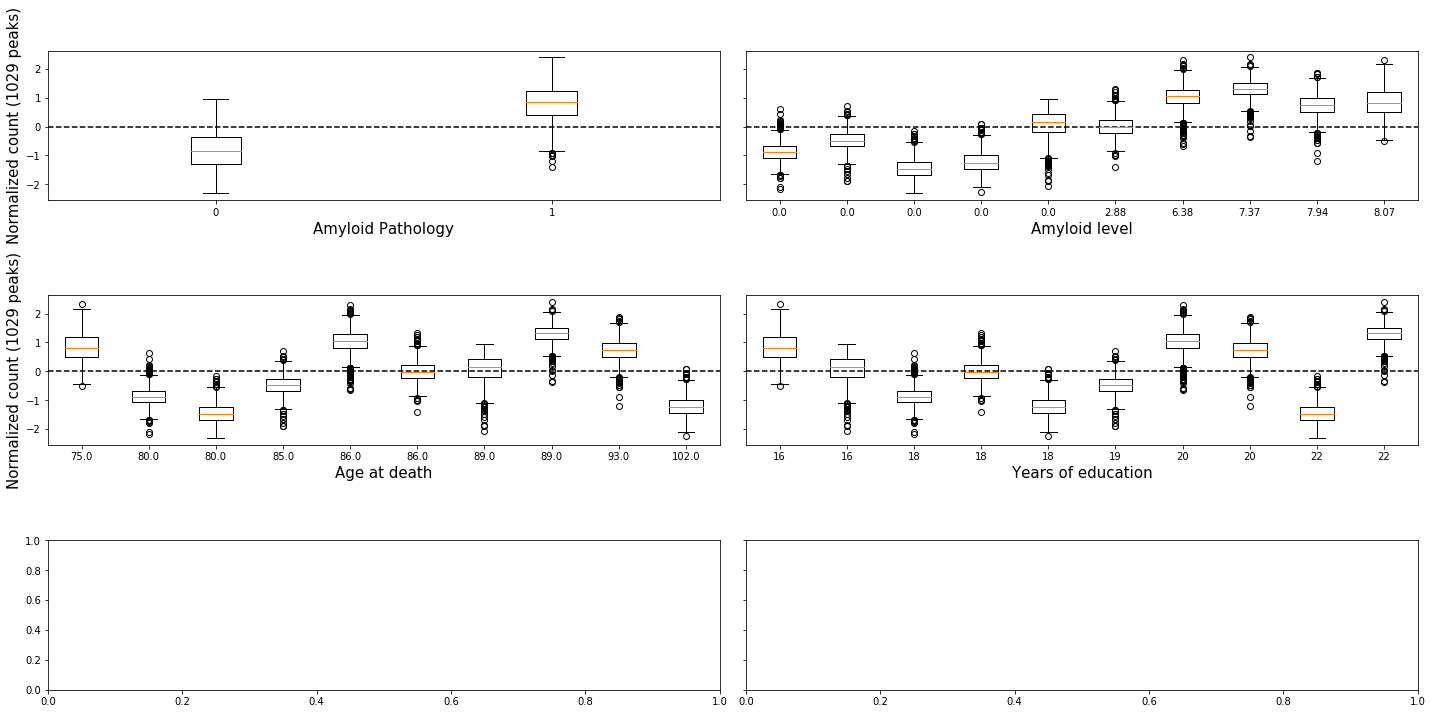

In [39]:
fig, ax = plt.subplots(3, 2, sharey='row', figsize=(20,10))
sampleInfoControls = sampleInfo.loc[sampleInfo.binary_amyloid==0].sort_values('amyloid')
sampleInfoCases = sampleInfo.loc[sampleInfo.binary_amyloid==1].sort_values('amyloid')
vstControls = scaledVst[sampleInfoControls.index]
vstCases = scaledVst[sampleInfoCases.index]

ax[0,0].boxplot([vstControls.values.flatten(), vstCases.values.flatten()], labels = [0,1])
ax[0,0].axhline(y=0, linestyle='dashed', c='k')
ax[0,0].tick_params(labelsize=10)
ax[0,0].set_ylabel("Normalized count ("+str(scaledVst.shape[0])+" peaks)",fontsize=15)
ax[0,0].set_xlabel("Amyloid Pathology",fontsize=15)


sampleInfo = sampleInfo.sort_values('amyloid')
scaledVst = scaledVst[sampleInfo.index]

ax[0,1].boxplot(scaledVst.values, labels = sampleInfo.round({'amyloid': 2}).amyloid)
ax[0,1].axhline(y=0, linestyle='dashed', c='k')
ax[0,1].tick_params(labelsize=10)
ax[0,1].set_xlabel("Amyloid level", fontsize=15)



sampleInfo = sampleInfo.sort_values('age_death')
scaledVst = scaledVst[sampleInfo.index]

ax[1,0].boxplot(scaledVst.values, labels = sampleInfo.round({'age_death': 0}).age_death)
ax[1,0].axhline(y=0, linestyle='dashed', c='k')
ax[1,0].tick_params(labelsize=10)
ax[1,0].set_ylabel("Normalized count ("+str(scaledVst.shape[0])+" peaks)",fontsize=15)
ax[1,0].set_xlabel("Age at death",fontsize=15)


sampleInfo = sampleInfo.sort_values('educ')
scaledVst = scaledVst[sampleInfo.index]

ax[1,1].boxplot(scaledVst.values, labels = sampleInfo.educ)
ax[1,1].axhline(y=0, linestyle='dashed', c='k')
ax[1,1].tick_params(labelsize=10)
ax[1,1].set_xlabel("Years of education",fontsize=15)

plt.savefig("glia_dlpfc_binary_amyloid_up_box.svg")

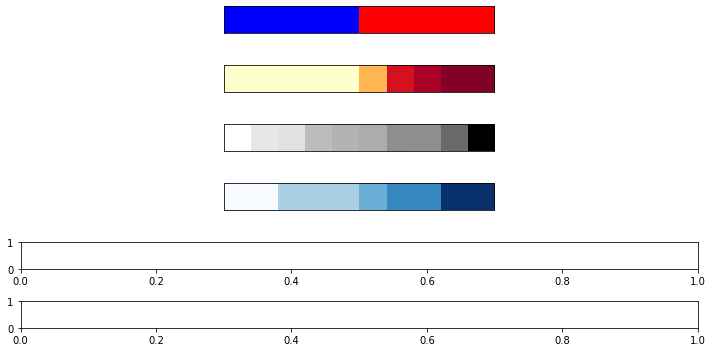

In [40]:
fig,ax=plt.subplots(6,1,figsize=(10,5))

ax[0].tick_params(axis=u'both', which=u'both',length=0)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].imshow([list(sampleInfo.sort_values('amyloid').binary_amyloid),], cmap="bwr")



ax[1].tick_params(axis=u'both', which=u'both',length=0)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].imshow([list(sampleInfo.sort_values('amyloid').amyloid),], cmap="YlOrRd")


ax[2].tick_params(axis=u'both', which=u'both',length=0)
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])
ax[2].imshow([list(sampleInfo.sort_values('age_death').age_death),], cmap="Greys")


ax[3].tick_params(axis=u'both', which=u'both',length=0)
ax[3].set_xticklabels([])
ax[3].set_yticklabels([])
ax[3].imshow([list(sampleInfo.sort_values('educ').educ),], cmap="Blues")

plt.savefig("glia_dlpfc_binary_amyloid_up_box_metadata.svg")

In [41]:
sampleInfo["avg_RSC"] = [1.135576,  
                         1.0654365,  
                         0.92216695, 
                         0.95478685, 
                         0.6914604,  
                         0.92110375,  
                         1.1044035, 
                         1.142778,  
                         0.58776395, 
                         1.085077] 

Text(0.5, 0, 'Avg. RSC QC passed replicates')

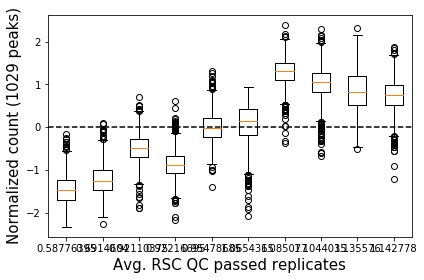

In [48]:
sampleInfo = sampleInfo.sort_values('avg_RSC')
scaledVst = scaledVst[sampleInfo.index]

plt.boxplot(scaledVst.values, labels = sampleInfo.avg_RSC)
plt.axhline(y=0, linestyle='dashed', c='k')
plt.tick_params(labelsize=10)
plt.ylabel("Normalized count ("+str(scaledVst.shape[0])+" peaks)",fontsize=15)
plt.xlabel("Avg. RSC QC passed replicates",fontsize=15)

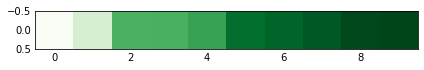

In [49]:
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.imshow([list(sampleInfo.sort_values('avg_RSC').avg_RSC),], cmap="Greens")
plt.savefig("dlpfc_oeg_samples_avg_rsc.svg")

In [45]:
sampleInfo["pmi"] = [
                     1.333333333,
                     4.5,
                     15.16666667,
                     16.75,
                     20.48333333,
                     7,
                     3.5,
                     4.5,
                     5.083333333,
                     7.75]

Text(0.5, 0, 'pmi')

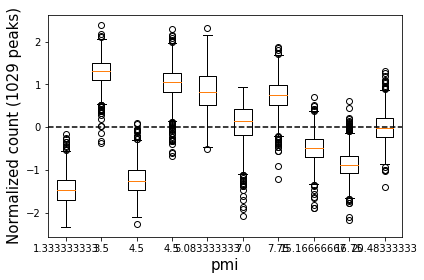

In [50]:
sampleInfo = sampleInfo.sort_values('pmi')
scaledVst = scaledVst[sampleInfo.index]

plt.boxplot(scaledVst.values, labels = sampleInfo.pmi)
plt.axhline(y=0, linestyle='dashed', c='k')
plt.tick_params(labelsize=10)
plt.ylabel("Normalized count ("+str(scaledVst.shape[0])+" peaks)",fontsize=15)
plt.xlabel("pmi",fontsize=15)

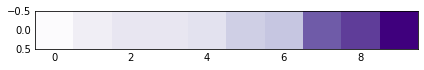

In [51]:
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.imshow([list(sampleInfo.sort_values('pmi').pmi),], cmap="Purples")
plt.savefig("dlpfc_oeg_samples_pmi.svg")